# Optimal approximations for $\sin$

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

## Linear fit 

In [2]:
x, a, b = sp.symbols('x a b')

Let's find the linear approximation $a + bx$ for $\sin(x)$ on the interval $x \in [0, 0.4]$ 
$$
J = J(a, b) = \int_0^{0.4} \left[ \sin(x) - (a + bx) \right]^2 dx
$$

In [3]:
J = sp.integrate((sp.sin(x) -a - b * x)**2, (x, 0, 0.4)).simplify()

In [4]:
optimal_solution = sp.solve([sp.Eq(J.diff(a), 0), sp.Eq(J.diff(b), 0)])

Optimal parameters

In [5]:
optimal_solution[a]

0.00211713344003313

In [6]:
optimal_solution[b]

0.976151907763772

In [7]:
[(_, v.evalf()) for _, v in optimal_solution.items()]

[(a, 0.00211713344003313), (b, 0.976151907763772)]

Compare

In [8]:
linear_fit = sp.lambdify(x, (a + b * x).subs(optimal_solution), 'numpy')

In [20]:
phi = np.linspace(0, 0.4, 200)

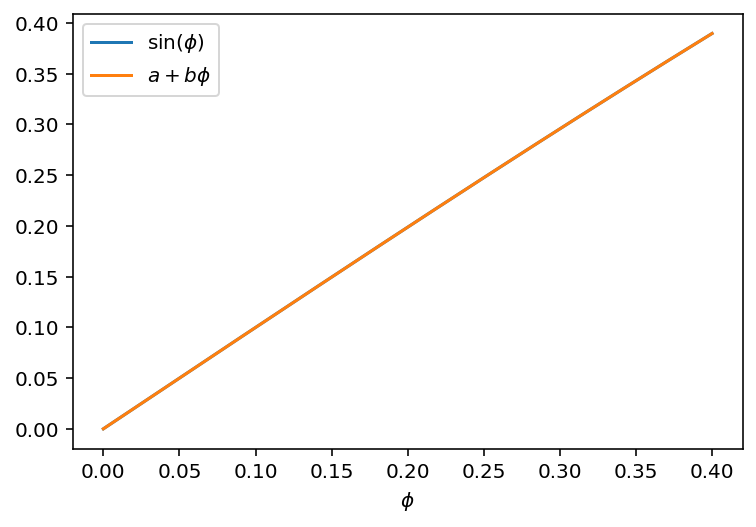

In [21]:
plt.plot(phi, np.sin(phi), label='$\sin(\phi)$')
plt.plot(phi, linear_fit(phi), label='$a + b \phi$')
#plt.plot(phi, phi)
plt.xlabel('$\phi$')
plt.legend()
plt.show()

### The least-square error for the cubic fit

In [11]:
J.subs(optimal_solution).simplify().evalf()

5.73688090074742e-7

In other words,
$$
\min_{a, b} \int_0^{0.4} \left[ \sin(x) - (a + bx) \right]^2 dx \approx 5.73 \times 10^{-7}
$$

## Qubic fit

Let's find the qubic approximation for $\sin(x)$ on the interval $x \in [0, 0.4]$ 
$$
J = J(a, b, c) = \int_0^{0.4} \left[ \sin(x) - \left(a + bx + cx^3\right) \right]^2 dx
$$

In [12]:
c = sp.symbols('c')

In [13]:
J = sp.integrate((sp.sin(x) -a - b * x -c * x ** 3)**2, (x, 0, 0.4)).simplify()

In [14]:
J

0.4*a**2 + 0.16*a*b + 0.0128*a*c - 0.15787801199423*a + 0.0213333333333333*b**2 + 0.004096*b*c - 0.0419878894149929*b + 0.000234057142857143*c**2 - 0.00401846489397821*c + 0.0206609772751193

In [15]:
optimal_solution = sp.solve([sp.Eq(J.diff(a), 0), sp.Eq(J.diff(b), 0), sp.Eq(J.diff(c), 0)])

In [16]:
optimal_solution[a]

4.78978628463542e-6

In [17]:
linear_fit = sp.lambdify(x, (a + b * x + c * x ** 3).subs(optimal_solution), 'numpy')

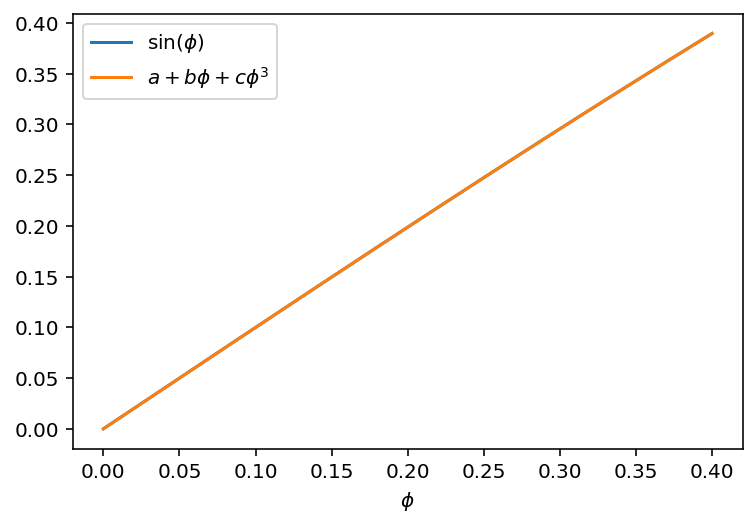

In [22]:
phi = np.linspace(0, 0.4, 200)

plt.plot(phi, np.sin(phi), label='$\sin(\phi)$')
plt.plot(phi, linear_fit(phi), label='$a + b \phi + c \phi ^ 3$')
plt.xlabel('$\phi$')
plt.legend()
plt.show()

### The least-square error for the cubic fit

In [19]:
J.subs(optimal_solution).simplify().evalf()

2.92716793373480e-12

In other words,
$$
\min_{a,b,c} \int_0^{0.4} \left[ \sin(x) - \left(a + bx + cx^3\right) \right]^2 dx \approx 3 \times 10^{-7}
$$